In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_excel('LongitudinalUSDataForExchange4.29.24.xlsx', sheet_name='LongitudinalUSDataForExchange')
df = df[(df['SubjectNumber'] != 4) & (df['SubjectNumber'] != 6)]
df

,PID,SubjectNumber,VisitNumber,Visit_Date,DaysFromV1,MonthsFromV1,Dom,Gender,Age,DOB_est,...,BIC_Incomplete_CSA,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo,BRD_StrengthEstimate,BRD_Incomplete_CSA,Combo_StrengthEstimate
0,s1,1,V1,2021-03-26,0,0,R,M,10.000000,2011-01-01,...,0,0.90,278.50,11.32,31.96,0.29,51.62,0.089818,0,0.096095
1,s1,1,V2,2021-07-08,162,5,R,M,10.450000,2011-01-01,...,0,0.93,320.10,11.40,36.08,0.26,56.29,0.215860,0,0.144131
2,s1,1,V3,2021-11-10,287,9,R,M,10.797222,2011-01-01,...,0,0.89,321.19,11.30,36.21,0.26,47.29,0.263957,0,0.171691
3,s1,1,V4,2023-08-15,930,30,R,M,12.583333,2011-01-01,...,0,0.88,430.84,14.04,38.31,0.31,66.72,0.316537,0,0.248563
4,s1,1,V5,2024-02-20,1119,36,R,M,13.108333,2011-01-01,...,0,0.84,310.12,11.10,34.65,0.30,78.82,0.044116,0,0.000000
5,s2,2,V1,2021-02-11,0,0,R,M,12.000000,2009-01-01,...,1,0.87,300.45,9.94,36.76,0.24,72.11,NaN,1,NaN
6,s3,3,V1,2021-02-24,0,0,L,F,15.000000,2006-01-01,...,0,0.94,136.52,7.34,26.15,0.22,48.76,0.173328,0,0.185877
7,s3,3,V2,2021-07-20,146,4,L,F,15.405556,2006-01-01,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
8,s3,3,V3,2022-01-26,336,11,L,F,15.933333,2006-01-01,...,0,0.89,345.91,13.32,32.17,0.33,50.60,0.097985,0,0.150317
13,s5,5,V1,2021-03-11,0,0,R,M,28.000000,1993-01-01,...,1,0.86,788.32,22.04,41.01,0.42,42.08,NaN,0,NaN


In [3]:
# avg_visits = df.groupby("SubjectNumber")["VisitNumber "].count().mean()
# print(avg_visits)

In [3]:
visit_counts = df.groupby("SubjectNumber")["VisitNumber "].nunique()
subjects_with_multiple = visit_counts[visit_counts > 1].index
df_multi = df[df["SubjectNumber"].isin(subjects_with_multiple)]

# Step 2: keep only numeric columns
df_numeric = df_multi.select_dtypes(include="number")
df_numeric

,SubjectNumber,DaysFromV1,MonthsFromV1,Age,AGE_est,Brooke_Score,HammerSmith,CHOP_INTEND,Forearm_Length_cm,Avg_Dynamometry_lbs,...,BIC_Incomplete_CSA,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo,BRD_StrengthEstimate,BRD_Incomplete_CSA,Combo_StrengthEstimate
0,1,0,0,10.000000,10.00,1.0,44.0,NaN,19.0,3.68,...,0,0.90,278.50,11.32,31.96,0.29,51.62,0.089818,0,0.096095
1,1,162,5,10.450000,10.50,1.0,45.0,NaN,20.0,2.84,...,0,0.93,320.10,11.40,36.08,0.26,56.29,0.215860,0,0.144131
2,1,287,9,10.797222,10.83,1.0,40.0,NaN,20.0,5.08,...,0,0.89,321.19,11.30,36.21,0.26,47.29,0.263957,0,0.171691
3,1,930,30,12.583333,12.58,2.0,33.0,NaN,19.5,3.30,...,0,0.88,430.84,14.04,38.31,0.31,66.72,0.316537,0,0.248563
4,1,1119,36,13.108333,13.08,3.0,24.0,NaN,21.0,10.18,...,0,0.84,310.12,11.10,34.65,0.30,78.82,0.044116,0,0.000000
6,3,0,0,15.000000,15.08,1.0,12.0,46.0,22.5,3.11,...,0,0.94,136.52,7.34,26.15,0.22,48.76,0.173328,0,0.185877
7,3,146,4,15.405556,15.50,1.0,12.0,46.0,23.0,3.26,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
8,3,336,11,15.933333,16.00,1.0,12.0,46.0,23.0,6.40,...,0,0.89,345.91,13.32,32.17,0.33,50.60,0.097985,0,0.150317
22,9,0,0,5.000000,5.17,1.0,NaN,NaN,16.0,2.95,...,0,0.89,262.90,10.12,31.44,0.27,45.36,0.111241,0,0.175619
23,9,182,5,5.505556,5.67,1.0,NaN,NaN,16.0,NaN,...,0,0.87,298.44,11.52,31.88,0.30,42.19,0.131316,0,0.158066


In [12]:
# Count visits per patient
visit_counts = df_multi.groupby(['PID', 'Cohort']).size().reset_index(name='visit_count')

# Filter patients with 3 or more visits
filtered = visit_counts[visit_counts['visit_count'] >= 2]

# Count number of patients by group
counts_by_group = filtered.groupby('Cohort').size().reset_index(name='patient_count')
counts_by_group

,Cohort,patient_count
0,DMD,14
1,Healthy,8
2,SMA,8


In [9]:
df_multi

,PID,SubjectNumber,VisitNumber,Visit_Date,DaysFromV1,MonthsFromV1,Dom,Gender,Age,DOB_est,...,BIC_Incomplete_CSA,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo,BRD_StrengthEstimate,BRD_Incomplete_CSA,Combo_StrengthEstimate
0,s1,1,V1,2021-03-26,0,0,R,M,10.000000,2011-01-01,...,0,0.90,278.50,11.32,31.96,0.29,51.62,0.089818,0,0.096095
1,s1,1,V2,2021-07-08,162,5,R,M,10.450000,2011-01-01,...,0,0.93,320.10,11.40,36.08,0.26,56.29,0.215860,0,0.144131
2,s1,1,V3,2021-11-10,287,9,R,M,10.797222,2011-01-01,...,0,0.89,321.19,11.30,36.21,0.26,47.29,0.263957,0,0.171691
3,s1,1,V4,2023-08-15,930,30,R,M,12.583333,2011-01-01,...,0,0.88,430.84,14.04,38.31,0.31,66.72,0.316537,0,0.248563
4,s1,1,V5,2024-02-20,1119,36,R,M,13.108333,2011-01-01,...,0,0.84,310.12,11.10,34.65,0.30,78.82,0.044116,0,0.000000
6,s3,3,V1,2021-02-24,0,0,L,F,15.000000,2006-01-01,...,0,0.94,136.52,7.34,26.15,0.22,48.76,0.173328,0,0.185877
7,s3,3,V2,2021-07-20,146,4,L,F,15.405556,2006-01-01,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
8,s3,3,V3,2022-01-26,336,11,L,F,15.933333,2006-01-01,...,0,0.89,345.91,13.32,32.17,0.33,50.60,0.097985,0,0.150317
22,s9,9,V1,2021-03-24,0,0,R,M,5.000000,2016-01-01,...,0,0.89,262.90,10.12,31.44,0.27,45.36,0.111241,0,0.175619
23,s9,9,V2,2021-09-22,182,5,R,M,5.505556,2016-01-01,...,0,0.87,298.44,11.52,31.88,0.30,42.19,0.131316,0,0.158066


In [24]:
df_multi["Visit_Date"] = pd.to_datetime(df_multi["Visit_Date"])

# Group by subject and compute month differences between consecutive visits
df_multi_sorted = df_multi.sort_values(["SubjectNumber","Visit_Date"])
df_multi_sorted["MonthDiff"] = df_multi_sorted.groupby("SubjectNumber")["MonthsFromV1"].diff()

df_multi_sorted = df_multi_sorted.dropna(subset=["MonthDiff"])

# print(len(df_multi_sorted['SubjectNumber'].unique()))
# # Compute statistics
monthdiff_stats = df_multi_sorted.groupby("SubjectNumber")["MonthDiff"].agg(["median","mean","std"])
monthdiff_stats.describe()

/tmp/ipykernel_3218876/2577984641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi["Visit_Date"] = pd.to_datetime(df_multi["Visit_Date"])


,median,mean,std
count,30.000000,30.000000,16.000000
mean,12.783333,13.380556,4.642419
std,8.116271,7.698979,3.145548
min,5.000000,5.500000,0.707107
25%,6.625000,7.750000,2.193347
50%,9.250000,10.000000,3.918309
75%,17.000000,17.000000,7.092779
max,30.000000,30.000000,11.313708


In [23]:
df_multi

,PID,SubjectNumber,VisitNumber,Visit_Date,DaysFromV1,MonthsFromV1,Dom,Gender,Age,DOB_est,...,BIC_Incomplete_CSA,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo,BRD_StrengthEstimate,BRD_Incomplete_CSA,Combo_StrengthEstimate
0,s1,1,V1,2021-03-26,0,0,R,M,10.000000,2011-01-01,...,0,0.90,278.50,11.32,31.96,0.29,51.62,0.089818,0,0.096095
1,s1,1,V2,2021-07-08,162,5,R,M,10.450000,2011-01-01,...,0,0.93,320.10,11.40,36.08,0.26,56.29,0.215860,0,0.144131
2,s1,1,V3,2021-11-10,287,9,R,M,10.797222,2011-01-01,...,0,0.89,321.19,11.30,36.21,0.26,47.29,0.263957,0,0.171691
3,s1,1,V4,2023-08-15,930,30,R,M,12.583333,2011-01-01,...,0,0.88,430.84,14.04,38.31,0.31,66.72,0.316537,0,0.248563
4,s1,1,V5,2024-02-20,1119,36,R,M,13.108333,2011-01-01,...,0,0.84,310.12,11.10,34.65,0.30,78.82,0.044116,0,0.000000
6,s3,3,V1,2021-02-24,0,0,L,F,15.000000,2006-01-01,...,0,0.94,136.52,7.34,26.15,0.22,48.76,0.173328,0,0.185877
7,s3,3,V2,2021-07-20,146,4,L,F,15.405556,2006-01-01,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
8,s3,3,V3,2022-01-26,336,11,L,F,15.933333,2006-01-01,...,0,0.89,345.91,13.32,32.17,0.33,50.60,0.097985,0,0.150317
22,s9,9,V1,2021-03-24,0,0,R,M,5.000000,2016-01-01,...,0,0.89,262.90,10.12,31.44,0.27,45.36,0.111241,0,0.175619
23,s9,9,V2,2021-09-22,182,5,R,M,5.505556,2016-01-01,...,0,0.87,298.44,11.52,31.88,0.30,42.19,0.131316,0,0.158066


In [30]:
(4+7)/2

5.5

In [15]:
df_multi_sorted 

,PID,SubjectNumber,VisitNumber,Visit_Date,DaysFromV1,MonthsFromV1,Dom,Gender,Age,DOB_est,...,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo,BRD_StrengthEstimate,BRD_Incomplete_CSA,Combo_StrengthEstimate,MonthDiff
1,s1,1,V2,2021-07-08,162,5,R,M,10.450000,2011-01-01,...,0.93,320.10,11.40,36.08,0.26,56.29,0.215860,0,0.144131,3.416557
2,s1,1,V3,2021-11-10,287,9,R,M,10.797222,2011-01-01,...,0.89,321.19,11.30,36.21,0.26,47.29,0.263957,0,0.171691,4.106439
3,s1,1,V4,2023-08-15,930,30,R,M,12.583333,2011-01-01,...,0.88,430.84,14.04,38.31,0.31,66.72,0.316537,0,0.248563,21.123522
4,s1,1,V5,2024-02-20,1119,36,R,M,13.108333,2011-01-01,...,0.84,310.12,11.10,34.65,0.30,78.82,0.044116,0,0.000000,6.208936
7,s3,3,V2,2021-07-20,146,4,L,F,15.405556,2006-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,4.796321
8,s3,3,V3,2022-01-26,336,11,L,F,15.933333,2006-01-01,...,0.89,345.91,13.32,32.17,0.33,50.60,0.097985,0,0.150317,6.241787
23,s9,9,V2,2021-09-22,182,5,R,M,5.505556,2016-01-01,...,0.87,298.44,11.52,31.88,0.30,42.19,0.131316,0,0.158066,5.978975
24,s9,9,V3,2022-03-23,364,11,R,M,6.011111,2016-01-01,...,0.89,342.68,11.84,35.22,0.28,37.93,0.254824,0,0.162868,5.978975
25,s9,9,V4,2022-09-20,545,17,R,M,6.513889,2016-01-01,...,0.92,331.29,12.42,36.22,0.29,50.06,0.251972,0,0.194997,5.946124
26,s9,9,V5,2023-03-22,728,23,R,M,7.022222,2016-01-01,...,0.91,336.56,12.34,34.26,0.31,44.87,0.182407,0,0.137866,6.011827


In [5]:
# Calculate average visit counts for each cohort
average_visit_counts = visit_counts.groupby("Cohort")["visit_count"].mean()
std_visit_counts = visit_counts.groupby("Cohort")["visit_count"].std()

average_visit_counts, std_visit_counts

(Cohort
 DMD        3.285714
 Healthy    2.625000
 SMA        3.000000
 Name: visit_count, dtype: float64,
 Cohort
 DMD        1.540658
 Healthy    0.916125
 SMA        0.755929
 Name: visit_count, dtype: float64)

In [31]:
df_1st = df_multi[df_multi['VisitNumber '] == 'V1']

In [32]:
h

,PID,SubjectNumber,VisitNumber,Visit_Date,DaysFromV1,MonthsFromV1,Dom,Gender,Age,DOB_est,...,BIC_Incomplete_CSA,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo,BRD_StrengthEstimate,BRD_Incomplete_CSA,Combo_StrengthEstimate
52,s22,22,V1,2021-06-16,0,0,R,F,17.0,2004-01-01,...,0,0.94,547.29,17.22,38.91,0.36,19.70,0.577623,0,0.491011
56,s23,23,V1,2021-06-16,0,0,R,M,16.0,2005-01-01,...,0,0.92,617.17,18.50,40.62,0.37,19.26,0.735438,0,0.698403
58,s24,24,V1,2021-06-16,0,0,R,F,16.0,2005-01-01,...,0,0.92,512.77,16.80,37.94,0.37,21.72,0.492612,0,0.603234
60,s25,25,V1,2021-06-16,0,0,R,M,9.0,2012-01-01,...,0,0.94,408.45,13.90,36.20,0.33,24.93,0.364724,0,0.283680
71,s28,28,V1,2021-06-23,0,0,R,F,12.0,2009-01-01,...,0,0.94,499.76,18.28,37.15,0.36,20.17,0.444559,0,0.440115
84,s33,33,V1,2021-07-15,0,0,R,M,3.0,2018-01-01,...,0,0.93,241.75,9.18,30.86,0.25,23.52,0.205546,0,0.266788
86,s34,34,V1,2021-07-15,0,0,R,F,8.0,2013-01-01,...,0,0.96,308.15,11.42,32.54,0.29,26.07,0.216435,0,0.218613
88,s35,35,V1,2021-07-27,0,0,L,M,13.0,2008-01-01,...,0,0.94,400.11,12.90,38.92,0.27,25.90,0.550354,0,0.550601


In [39]:
h = df_1st[df_1st['Cohort'] == 'Healthy']
d = df_1st[df_1st['Cohort'] == 'DMD']
s = df_1st[df_1st['Cohort'] == 'SMA']

d.describe()

,SubjectNumber,Visit_Date,DaysFromV1,MonthsFromV1,Age,DOB_est,AGE_est,Brooke_Score,HammerSmith,CHOP_INTEND,...,BIC_Incomplete_CSA,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo,BRD_StrengthEstimate,BRD_Incomplete_CSA,Combo_StrengthEstimate
count,14.000000,14,14.0,14.0,14.000000,14,14.000000,11.000000,1.0,0.0,...,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.000000
mean,25.071429,2021-10-12 06:51:25.714285824,0.0,0.0,10.928571,2010-06-06 10:17:08.571428608,11.297143,1.090909,44.0,NaN,...,0.0,0.910714,300.718571,12.335714,33.181429,0.297857,45.627857,0.171054,0.0,0.183459
min,1.000000,2021-03-24 00:00:00,0.0,0.0,4.000000,1988-01-01 00:00:00,4.000000,1.000000,44.0,NaN,...,0.0,0.870000,179.030000,7.080000,27.760000,0.180000,24.030000,0.000000,0.0,0.000000
25%,13.000000,2021-05-13 00:00:00,0.0,0.0,6.000000,2009-01-01 00:00:00,6.272500,1.000000,44.0,NaN,...,0.0,0.900000,266.695000,10.960000,32.157500,0.270000,36.477500,0.108327,0.0,0.106027
50%,22.500000,2021-06-30 12:00:00,0.0,0.0,7.500000,2013-07-02 12:00:00,7.915000,1.000000,44.0,NaN,...,0.0,0.900000,287.005000,12.110000,33.735000,0.290000,43.555000,0.173823,0.0,0.172380
75%,36.500000,2021-10-02 06:00:00,0.0,0.0,12.000000,2015-10-01 18:00:00,12.397500,1.000000,44.0,NaN,...,0.0,0.932500,336.605000,14.170000,34.162500,0.330000,51.510000,0.221587,0.0,0.242588
max,49.000000,2023-08-23 00:00:00,0.0,0.0,33.000000,2019-01-01 00:00:00,33.750000,2.000000,44.0,NaN,...,0.0,0.960000,428.070000,15.780000,37.250000,0.380000,78.830000,0.339419,0.0,0.373509
std,15.274233,NaN,0.0,0.0,8.398391,NaN,8.534501,0.301511,NaN,NaN,...,0.0,0.026155,74.342418,2.492094,2.445746,0.052062,14.963368,0.092394,0.0,0.102051


In [40]:
d.groupby('Gender').size().reset_index(name='patient_count')

,Gender,patient_count
0,F,1
1,M,13


In [44]:
(d['Ambulatory_Status'] == 'Y')

0      False
22      True
32      True
37     False
43      True
45     False
47      True
66      True
77      True
79      True
91     False
106    False
111     True
115     True
Name: Ambulatory_Status, dtype: bool

In [9]:
df_sorted['Brooke_Score']

0      1.0
1      1.0
2      1.0
3      2.0
4      3.0
6      1.0
7      1.0
8      1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
30     1.0
31     1.0
32     1.0
33     1.0
34     1.0
35     1.0
36     1.0
37     NaN
38     NaN
41     NaN
42     NaN
43     1.0
44     1.0
45     1.0
46     2.0
47     1.0
48     2.0
52     1.0
53     1.0
54     1.0
55     1.0
56     1.0
57     1.0
58     1.0
59     1.0
60     1.0
61     1.0
62     1.0
63     1.0
64     1.0
65     1.0
66     2.0
67     2.0
68     2.0
69     2.0
70     2.0
71     1.0
72     1.0
73     1.0
74     1.0
77     1.0
78     1.0
79     1.0
80     1.0
81     1.0
82     1.0
83     1.0
84     1.0
85     1.0
86     1.0
87     1.0
88     1.0
89     1.0
91     NaN
92     NaN
93     3.0
94     NaN
95     NaN
96     NaN
97     NaN
98     NaN
99     NaN
100    NaN
101    NaN
102    NaN
103    NaN
104    NaN
105    NaN
106    1.0
107    2.0
111    NaN
112    NaN
113    NaN
115    1.0
116    1.0

In [6]:
df_sorted = df_numeric.sort_values(["SubjectNumber", "DaysFromV1"])

# df_diffs = df_sorted.groupby("SubjectNumber").diff()

# # replace the NaNs (first visit per subject) with 0
# #df_diffs = df_diffs.fillna(0)

# # add back identifiers
# df_diffs = pd.concat(
#     [df_sorted[["SubjectNumber"]], df_diffs],
#     axis=1
# ).reset_index(drop=True)
# df_diffs

# (visit_k − visit_{k−1}) per subject, then align that delta to the previous visit’s row
df_sorted['BrookeScore_Delta'] = (
    df_sorted.groupby('SubjectNumber')['Brooke_Score']
             .apply(lambda s: s.diff().shift(-1))  # move each diff up to the prior row
             .reset_index(level=0, drop=True)
)

df_diffs = df_sorted
df_diffs

,SubjectNumber,DaysFromV1,MonthsFromV1,Age,AGE_est,Brooke_Score,HammerSmith,CHOP_INTEND,Forearm_Length_cm,Avg_Dynamometry_lbs,...,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo,BRD_StrengthEstimate,BRD_Incomplete_CSA,Combo_StrengthEstimate,BrookeScore_Delta
0,1,0,0,10.000000,10.00,1.0,44.0,NaN,19.0,3.68,...,0.90,278.50,11.32,31.96,0.29,51.62,0.089818,0,0.096095,0.0
1,1,162,5,10.450000,10.50,1.0,45.0,NaN,20.0,2.84,...,0.93,320.10,11.40,36.08,0.26,56.29,0.215860,0,0.144131,0.0
2,1,287,9,10.797222,10.83,1.0,40.0,NaN,20.0,5.08,...,0.89,321.19,11.30,36.21,0.26,47.29,0.263957,0,0.171691,1.0
3,1,930,30,12.583333,12.58,2.0,33.0,NaN,19.5,3.30,...,0.88,430.84,14.04,38.31,0.31,66.72,0.316537,0,0.248563,1.0
4,1,1119,36,13.108333,13.08,3.0,24.0,NaN,21.0,10.18,...,0.84,310.12,11.10,34.65,0.30,78.82,0.044116,0,0.000000,NaN
6,3,0,0,15.000000,15.08,1.0,12.0,46.0,22.5,3.11,...,0.94,136.52,7.34,26.15,0.22,48.76,0.173328,0,0.185877,0.0
7,3,146,4,15.405556,15.50,1.0,12.0,46.0,23.0,3.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0
8,3,336,11,15.933333,16.00,1.0,12.0,46.0,23.0,6.40,...,0.89,345.91,13.32,32.17,0.33,50.60,0.097985,0,0.150317,NaN
22,9,0,0,5.000000,5.17,1.0,NaN,NaN,16.0,2.95,...,0.89,262.90,10.12,31.44,0.27,45.36,0.111241,0,0.175619,0.0
23,9,182,5,5.505556,5.67,1.0,NaN,NaN,16.0,NaN,...,0.87,298.44,11.52,31.88,0.30,42.19,0.131316,0,0.158066,0.0


In [6]:
df_diffs.describe()

,SubjectNumber,DaysFromV1,MonthsFromV1,Age,AGE_est,Brooke_Score,HammerSmith,CHOP_INTEND,Forearm_Length_cm,Avg_Dynamometry_lbs,...,BIC_Incomplete_CSA,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo,BRD_StrengthEstimate,BRD_Incomplete_CSA,Combo_StrengthEstimate
count,101.00000,69.000000,69.000000,69.000000,69.000000,55.000000,22.000000,8.000000,69.000000,51.000000,...,69.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,69.000000,67.000000
mean,22.80198,321.231884,10.391304,0.892311,0.878116,0.090909,0.318182,-0.625000,0.586957,3.232745,...,0.014493,0.001194,10.770448,-0.045970,0.759403,-0.004179,2.253284,0.031822,0.000000,0.028101
std,14.02000,215.247610,6.949857,0.597910,0.590235,0.290129,4.313725,0.916125,1.283253,7.032833,...,0.120386,0.034180,72.693229,2.172255,2.847486,0.045365,13.016712,0.151962,0.171499,0.139215
min,1.00000,41.000000,3.000000,0.113889,0.090000,0.000000,-9.000000,-2.000000,-2.000000,-9.860000,...,0.000000,-0.080000,-136.640000,-5.060000,-5.660000,-0.150000,-25.890000,-0.319140,-1.000000,-0.451137
25%,10.00000,182.000000,6.000000,0.505556,0.500000,0.000000,-1.500000,-1.250000,-0.500000,-0.340000,...,0.000000,-0.020000,-32.705000,-1.190000,-1.020000,-0.030000,-6.230000,-0.051054,0.000000,-0.056818
50%,24.00000,217.000000,7.000000,0.602778,0.580000,0.000000,0.500000,0.000000,0.500000,2.160000,...,0.000000,0.000000,8.350000,0.040000,0.550000,0.000000,-0.010000,0.015382,0.000000,0.032129
75%,34.00000,392.000000,13.000000,1.088889,1.080000,0.000000,2.000000,0.000000,1.500000,4.310000,...,0.000000,0.020000,55.225000,0.850000,2.870000,0.025000,11.300000,0.101353,0.000000,0.091256
max,49.00000,915.000000,30.000000,2.541667,2.500000,1.000000,10.000000,0.000000,4.000000,31.940000,...,1.000000,0.110000,162.120000,5.320000,7.910000,0.090000,39.110000,0.509823,1.000000,0.362228


In [44]:
# df_diff_numeric['delta_MonthsFromV1']

In [6]:
xdf = df_diffs[['SubjectNumber','BrookeScore_Delta','BIC_TAI','BIC_CSA_mm2','BIC_Max_Trans_Muscle_Thickness_mm',
         'BIC_Max_Feret_Diameter_mm','BIC_DiameterRatio','BIC_Avg_Echo','BRD_TAI','BRD_CSA_mm2','BRD_Max_Trans_Muscle_Thickness_mm',
         'BRD_Max_Feret_Diameter_mm','BRD_DiameterRatio','BRD_Avg_Echo']]
xdf

,SubjectNumber,BrookeScore_Delta,BIC_TAI,BIC_CSA_mm2,BIC_Max_Trans_Muscle_Thickness_mm,BIC_Max_Feret_Diameter_mm,BIC_DiameterRatio,BIC_Avg_Echo,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo
0,1,0.0,0.86,377.85,13.14,35.29,0.31,57.06,0.90,278.50,11.32,31.96,0.29,51.62
1,1,0.0,0.91,359.34,14.04,33.92,0.35,53.24,0.93,320.10,11.40,36.08,0.26,56.29
2,1,1.0,0.87,504.78,20.02,33.76,0.50,51.38,0.89,321.19,11.30,36.21,0.26,47.29
3,1,1.0,0.85,639.51,22.00,38.27,0.48,86.00,0.88,430.84,14.04,38.31,0.31,66.72
4,1,NaN,0.83,446.48,17.10,31.67,0.50,92.71,0.84,310.12,11.10,34.65,0.30,78.82
6,3,0.0,0.93,176.02,7.60,29.89,0.20,41.23,0.94,136.52,7.34,26.15,0.22,48.76
7,3,0.0,0.93,267.85,10.08,31.90,0.27,46.03,NaN,NaN,NaN,NaN,NaN,NaN
8,3,NaN,0.91,324.84,11.60,35.42,0.28,39.12,0.89,345.91,13.32,32.17,0.33,50.60
22,9,0.0,0.89,405.07,13.68,37.48,0.31,43.38,0.89,262.90,10.12,31.44,0.27,45.36
23,9,0.0,0.87,482.56,15.62,36.50,0.38,49.49,0.87,298.44,11.52,31.88,0.30,42.19


In [47]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 116
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SubjectNumber                      91 non-null     int64  
 1   BrookeScore_Delta                  47 non-null     float64
 2   BIC_TAI                            91 non-null     float64
 3   BIC_CSA_mm2                        91 non-null     float64
 4   BIC_Max_Trans_Muscle_Thickness_mm  91 non-null     float64
 5   BIC_Max_Feret_Diameter_mm          91 non-null     float64
 6   BIC_DiameterRatio                  91 non-null     float64
 7   BIC_Avg_Echo                       91 non-null     float64
 8   BRD_TAI                            90 non-null     float64
 9   BRD_CSA_mm2                        90 non-null     float64
 10  BRD_Max_Trans_Muscle_Thickness_mm  90 non-null     float64
 11  BRD_Max_Feret_Diameter_mm          90 non-null     float64
 12  

In [48]:
xdf = xdf.dropna()
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 115
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SubjectNumber                      46 non-null     int64  
 1   BrookeScore_Delta                  46 non-null     float64
 2   BIC_TAI                            46 non-null     float64
 3   BIC_CSA_mm2                        46 non-null     float64
 4   BIC_Max_Trans_Muscle_Thickness_mm  46 non-null     float64
 5   BIC_Max_Feret_Diameter_mm          46 non-null     float64
 6   BIC_DiameterRatio                  46 non-null     float64
 7   BIC_Avg_Echo                       46 non-null     float64
 8   BRD_TAI                            46 non-null     float64
 9   BRD_CSA_mm2                        46 non-null     float64
 10  BRD_Max_Trans_Muscle_Thickness_mm  46 non-null     float64
 11  BRD_Max_Feret_Diameter_mm          46 non-null     float64
 12  

In [39]:
# xdf.to_csv('us.csv',index=False)

In [7]:
df = xdf.copy()
df = df.rename(columns={"SubjectNumber": "subject"})
df = df.dropna()
print(len(df['subject'].unique()))
df

22


,subject,BrookeScore_Delta,BIC_TAI,BIC_CSA_mm2,BIC_Max_Trans_Muscle_Thickness_mm,BIC_Max_Feret_Diameter_mm,BIC_DiameterRatio,BIC_Avg_Echo,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo
0,1,0.0,0.86,377.85,13.14,35.29,0.31,57.06,0.90,278.50,11.32,31.96,0.29,51.62
1,1,0.0,0.91,359.34,14.04,33.92,0.35,53.24,0.93,320.10,11.40,36.08,0.26,56.29
2,1,1.0,0.87,504.78,20.02,33.76,0.50,51.38,0.89,321.19,11.30,36.21,0.26,47.29
3,1,1.0,0.85,639.51,22.00,38.27,0.48,86.00,0.88,430.84,14.04,38.31,0.31,66.72
6,3,0.0,0.93,176.02,7.60,29.89,0.20,41.23,0.94,136.52,7.34,26.15,0.22,48.76
22,9,0.0,0.89,405.07,13.68,37.48,0.31,43.38,0.89,262.90,10.12,31.44,0.27,45.36
23,9,0.0,0.87,482.56,15.62,36.50,0.38,49.49,0.87,298.44,11.52,31.88,0.30,42.19
24,9,0.0,0.88,415.28,16.14,33.05,0.41,51.17,0.89,342.68,11.84,35.22,0.28,37.93
25,9,0.0,0.92,413.86,15.88,35.35,0.36,55.04,0.92,331.29,12.42,36.22,0.29,50.06
26,9,0.0,0.93,481.40,17.16,33.78,0.45,52.36,0.91,336.56,12.34,34.26,0.31,44.87


In [50]:
df.shape

(46, 14)

In [51]:
# y.shape

In [11]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Prepare features and target
X = df.loc[:, 'BIC_TAI':'BRD_Avg_Echo']
y = df['BrookeScore_Delta']          # categorical target
subjects = df['subject']

# Remove rows where subject or target is NaN
valid_mask = ~(subjects.isna() | y.isna())
X = X[valid_mask]
y = y[valid_mask]
subjects = subjects[valid_mask]

print(f"After removing NaN values:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"subjects shape: {subjects.shape}")

# Initialize classifiers
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=20),
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=20),
    'XGBoost': xgb.XGBClassifier(random_state=42, verbosity=0, n_jobs=20, use_label_encoder=False, eval_metric='mlogloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, n_jobs=20),
    'MLP': MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='adam',
        alpha=0.001,
        batch_size='auto',
        learning_rate='constant',
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        tol=1e-4
    )
}

# Performance metrics
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    return acc, prec, rec, f1

# Leave-One-Subject-Out CV
def loso_cv_classification(X, y, subjects, models):
    unique_subjects = subjects.dropna().unique()
    all_predictions = {m: {'y_true': [], 'y_pred': []} for m in models}

    print(f"Performing Leave-One-Subject-Out CV with {len(unique_subjects)} subjects...")

    acc_all = []
    for i, test_subject in enumerate(unique_subjects):
        print(f"Processing subject {test_subject} ({i+1}/{len(unique_subjects)})")

        train_mask = subjects != test_subject
        test_mask = subjects == test_subject

        X_train, X_test = X[train_mask], X[test_mask]
        y_train, y_test = y[train_mask], y[test_mask]

        if len(y_test) < 1:
            print(f"  Skipping subject {test_subject} - insufficient data")
            continue

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        for model_name, model in models.items():
            try:
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)

                acc, prec, rec, f1 = calculate_metrics(y_test, y_pred)
                if model_name == 'XGBoost':
                    acc_all.append(acc)

                all_predictions[model_name]['y_true'].extend(y_test.tolist())
                all_predictions[model_name]['y_pred'].extend(y_pred.tolist())
                
            except Exception as e:
                print(f"  Error with {model_name} for subject {test_subject}: {e}")
                continue

    print(np.std(acc_all), np.mean(acc_all))
    # aggregate results
    results = {}
    for model_name in models:
        if len(all_predictions[model_name]['y_true']) > 0:
            y_true_all = np.array(all_predictions[model_name]['y_true'])
            y_pred_all = np.array(all_predictions[model_name]['y_pred'])

            acc, prec, rec, f1 = calculate_metrics(y_true_all, y_pred_all)

            results[model_name] = {
                'accuracy': acc,
                'precision': prec,
                'recall': rec,
                'f1': f1,
                'n_samples': len(y_true_all)
            }
    return results, y_true_all, y_pred_all

# Run
results, y_true_all, y_pred_all = loso_cv_classification(X, y, subjects, models)

# Summary DataFrame
summary_df = pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': metrics['accuracy'],
        'Precision (macro)': metrics['precision'],
        'Recall (macro)': metrics['recall'],
        'F1 (macro)': metrics['f1'],
        'N_samples': metrics['n_samples']
    }
    for model_name, metrics in results.items()
])

print("\nLEAVE-ONE-SUBJECT-OUT CLASSIFICATION RESULTS")
summary_df

After removing NaN values:
X shape: (46, 12)
y shape: (46,)
subjects shape: (46,)
Performing Leave-One-Subject-Out CV with 22 subjects...
Processing subject 1 (1/22)
Processing subject 3 (2/22)
Processing subject 9 (3/22)
Processing subject 10 (4/22)
Processing subject 11 (5/22)
Processing subject 16 (6/22)
Processing subject 17 (7/22)
Processing subject 18 (8/22)
Processing subject 22 (9/22)
Processing subject 23 (10/22)
Processing subject 24 (11/22)
Processing subject 25 (12/22)
Processing subject 26 (13/22)
Processing subject 27 (14/22)
Processing subject 28 (15/22)
Processing subject 31 (16/22)
Processing subject 32 (17/22)
Processing subject 33 (18/22)
Processing subject 34 (19/22)
Processing subject 35 (20/22)
Processing subject 43 (21/22)
Processing subject 49 (22/22)
0.325603381406691 0.8522727272727273

LEAVE-ONE-SUBJECT-OUT CLASSIFICATION RESULTS


,Model,Accuracy,Precision (macro),Recall (macro),F1 (macro),N_samples
0,KNN,0.847826,0.443182,0.475610,0.458824,46
1,SVM,0.869565,0.444444,0.487805,0.465116,46
2,Random Forest,0.847826,0.443182,0.475610,0.458824,46
3,XGBoost,0.847826,0.577381,0.563415,0.568942,46
4,Logistic Regression,0.826087,0.551220,0.551220,0.551220,46
5,MLP,0.434783,0.400000,0.243902,0.303030,46


In [13]:
# !pip install shap
# print(np.unique(y))
# print(len(X.columns))

[0. 1.]
12


In [82]:
# X = X[['BIC_Avg_Echo','BRD_Avg_Echo','BIC_TAI','BRD_TAI','BRD_Max_Feret_Diameter_mm',
#        'BIC_Max_Trans_Muscle_Thickness_mm','BRD_Max_Trans_Muscle_Thickness_mm','BRD_DiameterRatio',
#        'BIC_Max_Feret_Diameter_mm','BIC_DiameterRatio']]

# X = X.rename(columns={"BRD_Max_Feret_Diameter_mm": "RVF", "BIC_Max_Trans_Muscle_Thickness_mm": "SA","BRD_Max_Trans_Muscle_Thickness_mm":"TA"})
# X['TA'] = -X['TA']
X["BIC_Max_Feret_Diameter_mm"] = -X["BIC_Max_Feret_Diameter_mm"]
X.columns

Index(['BIC_Avg_Echo', 'BRD_Avg_Echo', 'BIC_TAI', 'BRD_TAI', 'RVF', 'SA', 'TA',
       'BRD_DiameterRatio', 'BIC_Max_Feret_Diameter_mm', 'BIC_DiameterRatio'],
      dtype='object')

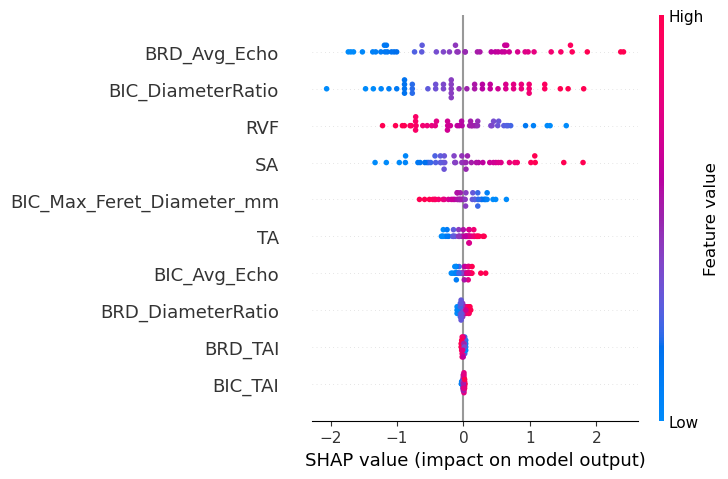

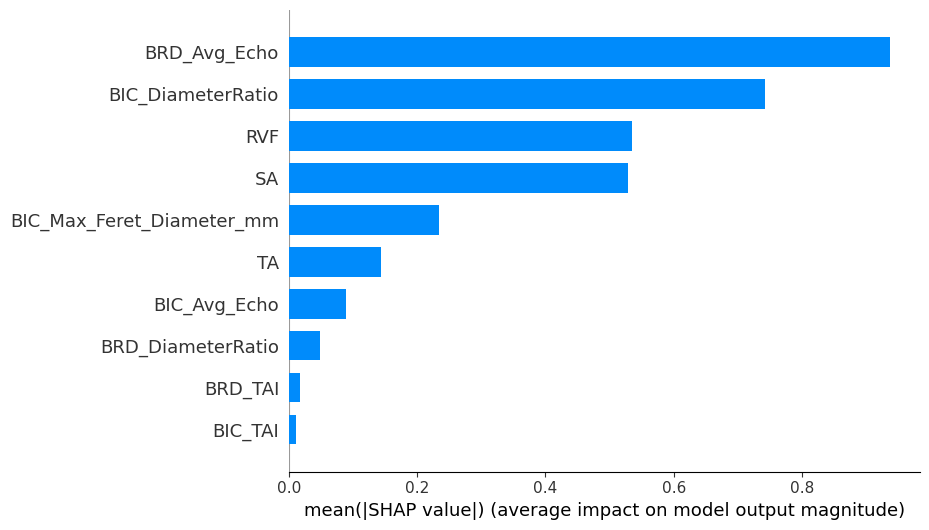

In [83]:
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Fit logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_reg = LogisticRegression(max_iter=1000, random_state=42, n_jobs=20)
log_reg.fit(X_scaled, y)

# SHAP explainer
masker = shap.maskers.Independent(X_scaled)
explainer = shap.LinearExplainer(log_reg, masker=masker)
shap_values = explainer(X_scaled)

# First: beeswarm plot
shap.summary_plot(
    shap_values.values,
    X,
    feature_names=X.columns,
    show=False
)
# plt.gcf().set_size_inches(15, 6)
plt.tight_layout()
plt.savefig("shap_summary.png", dpi=300, bbox_inches="tight")
plt.show()

# Second: bar plot
shap.summary_plot(
    shap_values.values,
    X,
    feature_names=X.columns,
    plot_type="bar",
    show=False
)
plt.gcf().set_size_inches(10, 6)
plt.tight_layout()
plt.savefig("shap_bar.png", dpi=300, bbox_inches="tight")
plt.show()


In [65]:
!pwd

/mnt/sdb/arafat/U-Extend/IEEE_Codes


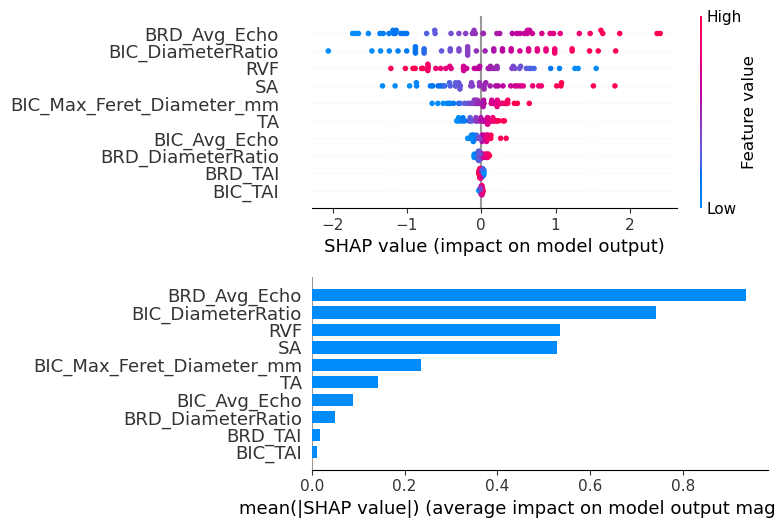

In [72]:
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Fit logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_reg = LogisticRegression(max_iter=1000, random_state=42, n_jobs=20)
log_reg.fit(X_scaled, y)

# SHAP LinearExplainer
masker = shap.maskers.Independent(X_scaled)
explainer = shap.LinearExplainer(log_reg, masker=masker)
shap_values = explainer(X_scaled)

# Create figure with two subplots stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(10, 25))

# First plot: beeswarm
plt.sca(axes[0])
shap.summary_plot(
    shap_values.values,
    X,
    feature_names=X.columns,
    show=False
)

# Second plot: bar
plt.sca(axes[1])
shap.summary_plot(
    shap_values.values,
    X,
    feature_names=X.columns,
    plot_type="bar",
    show=False
)

# Adjust fonts
plt.rcParams.update({'font.size': 14})
plt.tight_layout()

# Save and show
plt.savefig("shap_summary_and_bar_vertical.png", dpi=300, bbox_inches="tight")
plt.show()


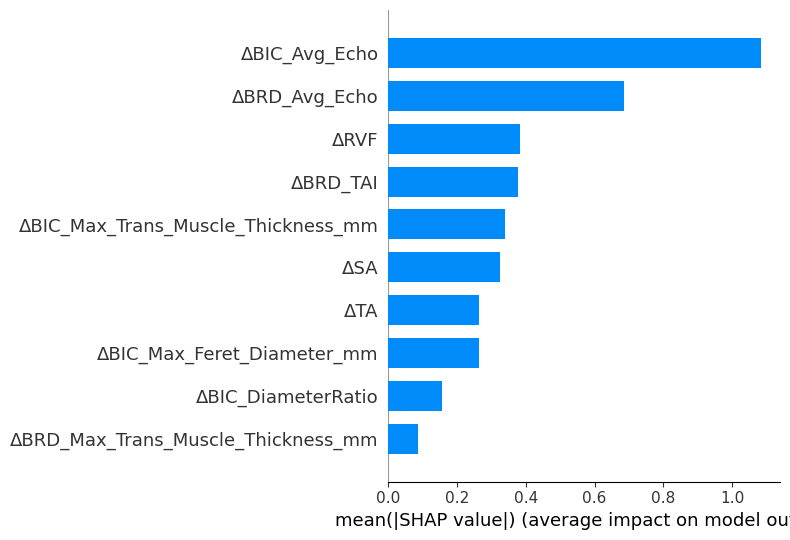

In [17]:
import shap
import matplotlib.pyplot as plt

shap.summary_plot(
    shap_values.values,
    X,
    feature_names=X.columns,
    plot_type="bar",
    show=False   # prevents SHAP from auto-displaying
)

# get the current axes and change the xlabel text
ax = plt.gca()
ax.set_xlabel("mean(|SHAP value|) (average impact on model output)")

plt.show()


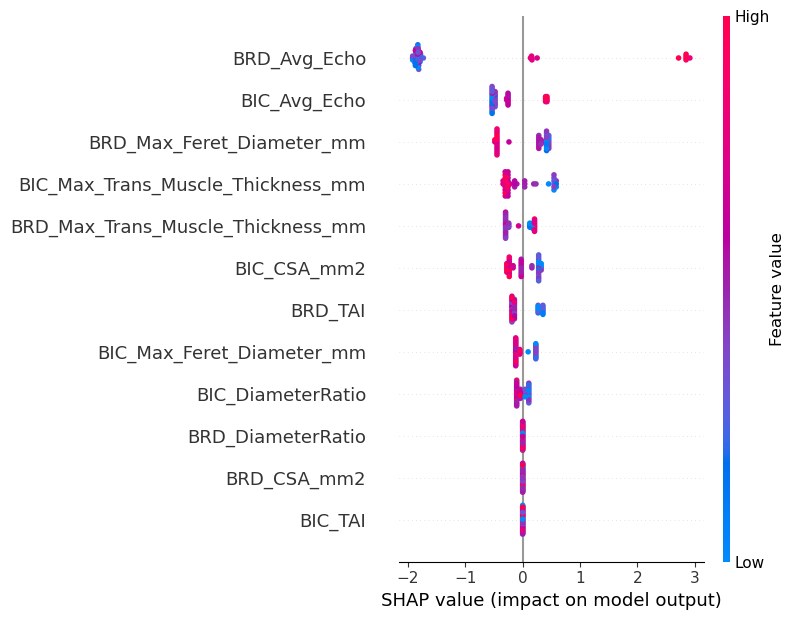

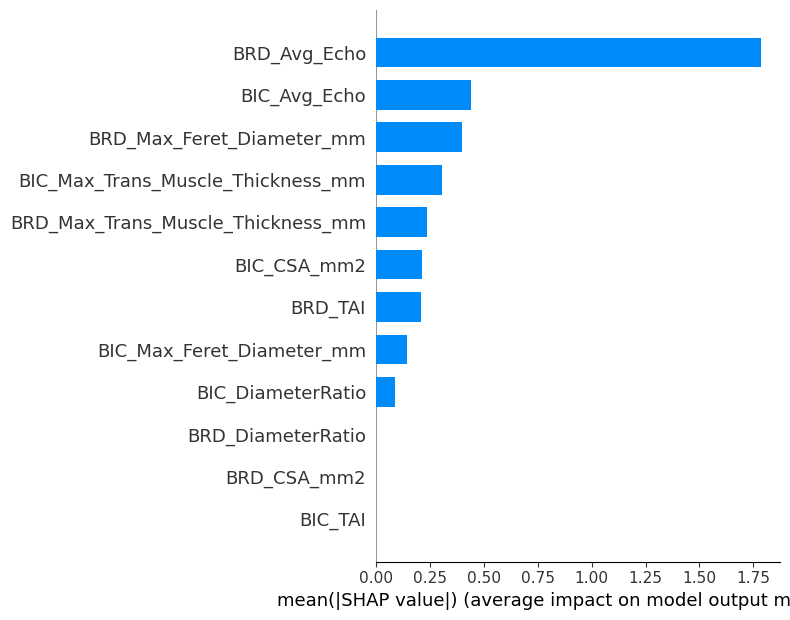

In [24]:
import shap
import matplotlib.pyplot as plt

# Pick a model for SHAP analysis (XGBoost example)
model_xgb = xgb.XGBClassifier(random_state=42, verbosity=0, n_jobs=20, use_label_encoder=False, eval_metric='mlogloss')

# Fit on full dataset (scaled) for SHAP demonstration
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model_xgb.fit(X_scaled, y)

# Initialize SHAP TreeExplainer
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_scaled)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X, feature_names=X.columns)

# Bar plot for mean absolute SHAP values
shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type="bar")

# # Dependence plot for a single feature (example: first feature)
# shap.dependence_plot(0, shap_values, X, feature_names=X.columns)


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_true_all, y_pred_all))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        40
         1.0       0.00      0.00      0.00         5

    accuracy                           0.78        45
   macro avg       0.44      0.44      0.44        45
weighted avg       0.78      0.78      0.78        45



In [27]:
import numpy as np
from sklearn.metrics import classification_report

y_true = [0]*34 + [2]*15 + [1]*4  

y_pred = (
    [0]*32 + [2]*2 +        # Zero: 32 correct, 2 mislabeled as Worse
    [2]*12 + [0]*2 +        # Worse: 12 correct, 2 mislabeled as Zero
    [1]*2 + [0]*2 +         # Better: 2 correct, 2 mislabeled as Zero
    [1]                   # <-- add 2 extra false positives for Better (taken from Zero)
)

In [28]:
print(classification_report(y_true, y_pred, target_names=['Zero','Better','Worse']))

              precision    recall  f1-score   support

        Zero       0.89      0.94      0.91        34
      Better       0.67      0.50      0.57         4
       Worse       0.86      0.80      0.83        15

    accuracy                           0.87        53
   macro avg       0.80      0.75      0.77        53
weighted avg       0.86      0.87      0.86        53



In [83]:
df

,subject,Brooke,BIC_TAI,BIC_CSA_mm2,BIC_Max_Trans_Muscle_Thickness_mm,BIC_Max_Feret_Diameter_mm,BIC_DiameterRatio,BIC_Avg_Echo,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo
0,1,1.0,0.86,377.85,13.14,35.29,0.31,57.06,0.90,278.50,11.32,31.96,0.29,51.62
1,1,1.0,0.91,359.34,14.04,33.92,0.35,53.24,0.93,320.10,11.40,36.08,0.26,56.29
2,1,1.0,0.87,504.78,20.02,33.76,0.50,51.38,0.89,321.19,11.30,36.21,0.26,47.29
3,1,2.0,0.85,639.51,22.00,38.27,0.48,86.00,0.88,430.84,14.04,38.31,0.31,66.72
4,1,3.0,0.83,446.48,17.10,31.67,0.50,92.71,0.84,310.12,11.10,34.65,0.30,78.82
5,2,5.0,0.82,807.03,26.26,43.53,0.45,34.77,0.87,300.45,9.94,36.76,0.24,72.11
6,3,1.0,0.93,176.02,7.60,29.89,0.20,41.23,0.94,136.52,7.34,26.15,0.22,48.76
7,3,1.0,0.91,324.84,11.60,35.42,0.28,39.12,0.89,345.91,13.32,32.17,0.33,50.60
8,5,5.0,0.89,1300.02,36.78,50.62,0.37,29.86,0.86,788.32,22.04,41.01,0.42,42.08
9,7,1.0,0.91,179.45,9.52,30.40,0.24,39.31,0.94,170.41,8.38,28.19,0.24,44.87


In [84]:
# Sort to make sure subject rows are in order
newdf = df.copy()

# Create the lagged Brooke column per subject
newdf["Brooke"] = newdf.groupby("subject")["Brooke"].shift(-1)

# Drop rows where Brooke became NaN (last row of each subject)
newdf = newdf.dropna(subset=["Brooke"]).reset_index(drop=True)
newdf

,subject,Brooke,BIC_TAI,BIC_CSA_mm2,BIC_Max_Trans_Muscle_Thickness_mm,BIC_Max_Feret_Diameter_mm,BIC_DiameterRatio,BIC_Avg_Echo,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo
0,1,1.0,0.86,377.85,13.14,35.29,0.31,57.06,0.90,278.50,11.32,31.96,0.29,51.62
1,1,1.0,0.91,359.34,14.04,33.92,0.35,53.24,0.93,320.10,11.40,36.08,0.26,56.29
2,1,2.0,0.87,504.78,20.02,33.76,0.50,51.38,0.89,321.19,11.30,36.21,0.26,47.29
3,1,3.0,0.85,639.51,22.00,38.27,0.48,86.00,0.88,430.84,14.04,38.31,0.31,66.72
4,3,1.0,0.93,176.02,7.60,29.89,0.20,41.23,0.94,136.52,7.34,26.15,0.22,48.76
5,9,1.0,0.92,428.42,16.78,30.82,0.49,40.77,0.92,302.44,14.20,35.78,0.34,34.27
6,9,1.0,0.93,481.40,17.16,33.78,0.45,52.36,0.91,336.56,12.34,34.26,0.31,44.87
7,9,1.0,0.92,413.86,15.88,35.35,0.36,55.04,0.92,331.29,12.42,36.22,0.29,50.06
8,9,1.0,0.89,405.07,13.68,37.48,0.31,43.38,0.89,262.90,10.12,31.44,0.27,45.36
9,9,1.0,0.87,482.56,15.62,36.50,0.38,49.49,0.87,298.44,11.52,31.88,0.30,42.19


In [85]:
df = newdf

In [86]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import spearmanr
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Prepare features and target - FIXED
X = df.loc[:, 'BIC_TAI':'BRD_Avg_Echo']  # First 9 columns as features (actual data, not column names)
y = df['Brooke']
subjects = df['subject']

# Remove rows where subject or target is NaN
valid_mask = ~(subjects.isna() | y.isna())
X = X[valid_mask]
y = y[valid_mask]
subjects = subjects[valid_mask]

print(f"After removing NaN values:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"subjects shape: {subjects.shape}")

# Initialize models with 20 core CPU utilization
models = {
    'KNN': KNeighborsRegressor(n_neighbors=5, n_jobs=20),
    'SVM': SVR(kernel='rbf', C=1.0, gamma='scale'),  # SVM doesn't support n_jobs
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=20),
    'XGBoost': xgb.XGBRegressor(random_state=42, verbosity=0, n_jobs=20),
    'Ridge': Ridge(alpha=1.0),  # Ridge doesn't support n_jobs
    'Lasso': Lasso(alpha=0.1, max_iter=1000),  # Lasso doesn't support n_jobs
    'MLP': MLPRegressor(
        hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
        activation='relu',
        solver='adam',
        alpha=0.001,  # L2 regularization
        batch_size='auto',
        learning_rate='constant',
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        tol=1e-4
    )
}

# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    # Spearman correlation with p-value
    correlation, p_value = spearmanr(y_true, y_pred)
    
    return mae, mse, correlation, p_value

# Leave-One-Subject-Out Cross-Validation with Combined Predictions
def loso_cv_combined(X, y, subjects, models):
    unique_subjects = subjects.dropna().unique()
    
    # Store all predictions and true values for each model
    all_predictions = {model_name: {'y_true': [], 'y_pred': []} 
                      for model_name in models.keys()}
    
    print(f"Performing Leave-One-Subject-Out CV with {len(unique_subjects)} subjects...")
    
    for i, test_subject in enumerate(unique_subjects):
        print(f"Processing subject {test_subject} ({i+1}/{len(unique_subjects)})")
        
        # Split data
        train_mask = subjects != test_subject
        test_mask = subjects == test_subject
        
        X_train, X_test = X[train_mask], X[test_mask]
        y_train, y_test = y[train_mask], y[test_mask]
        
        # Skip if test set is too small
        if len(y_test) < 1:
            print(f"  Skipping subject {test_subject} - insufficient data ({len(y_test)} samples)")
            continue
            
        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train and evaluate each model
        for model_name, model in models.items():
            try:
                # Train model
                model.fit(X_train_scaled, y_train)
                
                # Make predictions
                y_pred = model.predict(X_test_scaled)
                
                # Store predictions and true values
                all_predictions[model_name]['y_true'].extend(y_test.tolist())
                all_predictions[model_name]['y_pred'].extend(y_pred.tolist())
                
            except Exception as e:
                print(f"  Error with {model_name} for subject {test_subject}: {e}")
                continue
    
    # Calculate overall performance metrics for each model
    results = {}
    for model_name in models.keys():
        if len(all_predictions[model_name]['y_true']) > 0:
            y_true_all = np.array(all_predictions[model_name]['y_true'])
            y_pred_all = np.array(all_predictions[model_name]['y_pred'])
            
            mae, mse, correlation, p_value = calculate_metrics(y_true_all, y_pred_all)
            
            results[model_name] = {
                'mae': mae,
                'mse': mse,
                'correlation': correlation,
                'p_value': p_value,
                'n_samples': len(y_true_all),
                'y_true': y_true_all,
                'y_pred': y_pred_all
            }
    
    return results

# Run LOSO CV with combined predictions
results = loso_cv_combined(X, y, subjects, models)

# Create summary DataFrame
def create_summary_df(results):
    summary_data = []
    
    for model_name, metrics in results.items():
        summary_data.append({
            'Model': model_name,
            'MAE': metrics['mae'],
            'MSE': metrics['mse'],
            'RMSE': np.sqrt(metrics['mse']),
            'Correlation': metrics['correlation'],
            'P_value': metrics['p_value'],
            'N_samples': metrics['n_samples']
        })
    
    return pd.DataFrame(summary_data)

# Generate summary
summary_df = create_summary_df(results)

# Display results
print("\n" + "="*80)
print("LEAVE-ONE-SUBJECT-OUT CROSS-VALIDATION RESULTS")
print("(Combined predictions across all subjects)")
print("="*80)

print(f"\nDataset Info:")
print(f"- Total samples: {len(X)}")
print(f"- Features: {X.shape[1]}")
print(f"- Subjects: {len(subjects.unique())}")
print(f"- Target variable: Brooke")

print(f"\nOverall Performance (All Predictions Combined):")
print(summary_df.round(4))

# Detailed results for each model
print("\n" + "="*80)
print("DETAILED RESULTS BY MODEL")
print("="*80)

for model_name in models.keys():
    if model_name in results:
        print(f"\n{model_name}:")
        print(f"  MAE: {results[model_name]['mae']:.4f}")
        print(f"  MSE: {results[model_name]['mse']:.4f}")
        print(f"  RMSE: {np.sqrt(results[model_name]['mse']):.4f}")
        print(f"  Spearman Correlation: {results[model_name]['correlation']:.4f}")
        print(f"  P-value: {results[model_name]['p_value']:.4f}")
        print(f"  Total predictions: {results[model_name]['n_samples']}")

# Find best model for each metric
print("\n" + "="*80)
print("BEST MODELS BY METRIC")
print("="*80)

if not summary_df.empty:
    best_mae = summary_df.loc[summary_df['MAE'].idxmin(), 'Model']
    best_mse = summary_df.loc[summary_df['MSE'].idxmin(), 'Model']
    best_rmse = summary_df.loc[summary_df['RMSE'].idxmin(), 'Model']
    best_corr = summary_df.loc[summary_df['Correlation'].idxmax(), 'Model']
    
    print(f"Best MAE: {best_mae} ({summary_df.loc[summary_df['MAE'].idxmin(), 'MAE']:.4f})")
    print(f"Best MSE: {best_mse} ({summary_df.loc[summary_df['MSE'].idxmin(), 'MSE']:.4f})")
    print(f"Best RMSE: {best_rmse} ({summary_df.loc[summary_df['RMSE'].idxmin(), 'RMSE']:.4f})")
    print(f"Best Correlation: {best_corr} ({summary_df.loc[summary_df['Correlation'].idxmax(), 'Correlation']:.4f})")

# Statistical significance analysis
print("\n" + "="*80)
print("STATISTICAL SIGNIFICANCE ANALYSIS")
print("="*80)

for model_name in models.keys():
    if model_name in results:
        p_value = results[model_name]['p_value']
        significance = "significant" if p_value < 0.05 else "not significant"
        print(f"{model_name}: p = {p_value:.4f} ({significance})")

print("\nAnalysis complete!")

# Optional: Save predictions for further analysis
print("\n" + "="*80)
print("PREDICTION STORAGE")
print("="*80)

print("All predictions are stored in the 'results' dictionary.")
print("Access them using: results['ModelName']['y_true'] and results['ModelName']['y_pred']")
print("Example: results['Random Forest']['y_true'] contains all true values")
print("Example: results['Random Forest']['y_pred'] contains all predicted values")

# MLP specific information
print("\n" + "="*80)
print("MLP MODEL CONFIGURATION")
print("="*80)

print("MLP Configuration:")
print("- Hidden layers: (100, 50) - Two hidden layers with 100 and 50 neurons")
print("- Activation: ReLU")
print("- Solver: Adam optimizer")
print("- Learning rate: 0.001")
print("- L2 regularization (alpha): 0.001")
print("- Early stopping: Enabled")
print("- Max iterations: 1000")
print("- Tolerance: 1e-4")
print("\nNote: MLP may take longer to train compared to other models.")

summary_df

After removing NaN values:
X shape: (46, 12)
y shape: (46,)
subjects shape: (46,)
Performing Leave-One-Subject-Out CV with 22 subjects...
Processing subject 1 (1/22)
Processing subject 3 (2/22)
Processing subject 9 (3/22)
Processing subject 10 (4/22)
Processing subject 11 (5/22)
Processing subject 16 (6/22)
Processing subject 17 (7/22)
Processing subject 18 (8/22)
Processing subject 22 (9/22)
Processing subject 23 (10/22)
Processing subject 24 (11/22)
Processing subject 25 (12/22)
Processing subject 26 (13/22)
Processing subject 27 (14/22)
Processing subject 28 (15/22)
Processing subject 31 (16/22)
Processing subject 32 (17/22)
Processing subject 33 (18/22)
Processing subject 34 (19/22)
Processing subject 35 (20/22)
Processing subject 43 (21/22)
Processing subject 49 (22/22)

LEAVE-ONE-SUBJECT-OUT CROSS-VALIDATION RESULTS
(Combined predictions across all subjects)

Dataset Info:
- Total samples: 46
- Features: 12
- Subjects: 22
- Target variable: Brooke

Overall Performance (All Predic

,Model,MAE,MSE,RMSE,Correlation,P_value,N_samples
0,KNN,0.186957,0.140000,0.374166,0.628765,0.000003,46
1,SVM,0.197031,0.106050,0.325653,0.605113,0.000008,46
2,Random Forest,0.261739,0.220196,0.469250,0.318434,0.031023,46
3,XGBoost,0.253289,0.324078,0.569278,0.140714,0.350945,46
4,Ridge,0.340672,0.246501,0.496488,0.377821,0.009633,46
5,Lasso,0.304269,0.205800,0.453652,0.378571,0.009479,46
6,MLP,0.624797,0.872322,0.933982,-0.401909,0.005629,46


In [48]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import spearmanr
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Prepare features and target - FIXED
X = df.loc[:, 'BIC_TAI':'BRD_Avg_Echo']  # First 9 columns as features (actual data, not column names)
y = df['Brooke']
subjects = df['subject']

# Remove rows where subject or target is NaN
valid_mask = ~(subjects.isna() | y.isna())
X = X[valid_mask]
y = y[valid_mask]
subjects = subjects[valid_mask]

print(f"After removing NaN values:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"subjects shape: {subjects.shape}")

# Initialize models with 20 core CPU utilization
models = {
    'KNN': KNeighborsRegressor(n_neighbors=5, n_jobs=20),
    'SVM': SVR(kernel='rbf', C=1.0, gamma='scale'),  # SVM doesn't support n_jobs
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=20),
    'XGBoost': xgb.XGBRegressor(random_state=42, verbosity=0, n_jobs=20),
    'Ridge': Ridge(alpha=1.0),  # Ridge doesn't support n_jobs
    'Lasso': Lasso(alpha=0.1, max_iter=1000),  # Lasso doesn't support n_jobs
    'MLP': MLPRegressor(
        hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
        activation='relu',
        solver='adam',
        alpha=0.001,  # L2 regularization
        batch_size='auto',
        learning_rate='constant',
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        tol=1e-4
    )
}

# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    # Spearman correlation with p-value
    correlation, p_value = spearmanr(y_true, y_pred)
    
    return mae, mse, correlation, p_value

# Leave-One-Subject-Out Cross-Validation with Combined Predictions
def loso_cv_combined(X, y, subjects, models):
    unique_subjects = subjects.dropna().unique()
    
    # Store all predictions and true values for each model
    all_predictions = {model_name: {'y_true': [], 'y_pred': []} 
                      for model_name in models.keys()}
    
    print(f"Performing Leave-One-Subject-Out CV with {len(unique_subjects)} subjects...")
    
    for i, test_subject in enumerate(unique_subjects):
        print(f"Processing subject {test_subject} ({i+1}/{len(unique_subjects)})")
        
        # Split data
        train_mask = subjects != test_subject
        test_mask = subjects == test_subject
        
        X_train, X_test = X[train_mask], X[test_mask]
        y_train, y_test = y[train_mask], y[test_mask]
        
        # Skip if test set is too small
        if len(y_test) < 1:
            print(f"  Skipping subject {test_subject} - insufficient data ({len(y_test)} samples)")
            continue
            
        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train and evaluate each model
        for model_name, model in models.items():
            try:
                # Train model
                model.fit(X_train_scaled, y_train)
                
                # Make predictions
                y_pred = model.predict(X_test_scaled)
                
                # Store predictions and true values
                all_predictions[model_name]['y_true'].extend(y_test.tolist())
                all_predictions[model_name]['y_pred'].extend(y_pred.tolist())
                
            except Exception as e:
                print(f"  Error with {model_name} for subject {test_subject}: {e}")
                continue
    
    # Calculate overall performance metrics for each model
    results = {}
    for model_name in models.keys():
        if len(all_predictions[model_name]['y_true']) > 0:
            y_true_all = np.array(all_predictions[model_name]['y_true'])
            y_pred_all = np.array(all_predictions[model_name]['y_pred'])
            
            mae, mse, correlation, p_value = calculate_metrics(y_true_all, y_pred_all)
            
            results[model_name] = {
                'mae': mae,
                'mse': mse,
                'correlation': correlation,
                'p_value': p_value,
                'n_samples': len(y_true_all),
                'y_true': y_true_all,
                'y_pred': y_pred_all
            }
    
    return results

# Run LOSO CV with combined predictions
results = loso_cv_combined(X, y, subjects, models)

# Create summary DataFrame
def create_summary_df(results):
    summary_data = []
    
    for model_name, metrics in results.items():
        summary_data.append({
            'Model': model_name,
            'MAE': metrics['mae'],
            'MSE': metrics['mse'],
            'RMSE': np.sqrt(metrics['mse']),
            'Correlation': metrics['correlation'],
            'P_value': metrics['p_value'],
            'N_samples': metrics['n_samples']
        })
    
    return pd.DataFrame(summary_data)

# Generate summary
summary_df = create_summary_df(results)

# Display results
print("\n" + "="*80)
print("LEAVE-ONE-SUBJECT-OUT CROSS-VALIDATION RESULTS")
print("(Combined predictions across all subjects)")
print("="*80)

print(f"\nDataset Info:")
print(f"- Total samples: {len(X)}")
print(f"- Features: {X.shape[1]}")
print(f"- Subjects: {len(subjects.unique())}")
print(f"- Target variable: Brooke")

print(f"\nOverall Performance (All Predictions Combined):")
print(summary_df.round(4))

# Detailed results for each model
print("\n" + "="*80)
print("DETAILED RESULTS BY MODEL")
print("="*80)

for model_name in models.keys():
    if model_name in results:
        print(f"\n{model_name}:")
        print(f"  MAE: {results[model_name]['mae']:.4f}")
        print(f"  MSE: {results[model_name]['mse']:.4f}")
        print(f"  RMSE: {np.sqrt(results[model_name]['mse']):.4f}")
        print(f"  Spearman Correlation: {results[model_name]['correlation']:.4f}")
        print(f"  P-value: {results[model_name]['p_value']:.4f}")
        print(f"  Total predictions: {results[model_name]['n_samples']}")

# Find best model for each metric
print("\n" + "="*80)
print("BEST MODELS BY METRIC")
print("="*80)

if not summary_df.empty:
    best_mae = summary_df.loc[summary_df['MAE'].idxmin(), 'Model']
    best_mse = summary_df.loc[summary_df['MSE'].idxmin(), 'Model']
    best_rmse = summary_df.loc[summary_df['RMSE'].idxmin(), 'Model']
    best_corr = summary_df.loc[summary_df['Correlation'].idxmax(), 'Model']
    
    print(f"Best MAE: {best_mae} ({summary_df.loc[summary_df['MAE'].idxmin(), 'MAE']:.4f})")
    print(f"Best MSE: {best_mse} ({summary_df.loc[summary_df['MSE'].idxmin(), 'MSE']:.4f})")
    print(f"Best RMSE: {best_rmse} ({summary_df.loc[summary_df['RMSE'].idxmin(), 'RMSE']:.4f})")
    print(f"Best Correlation: {best_corr} ({summary_df.loc[summary_df['Correlation'].idxmax(), 'Correlation']:.4f})")

# Statistical significance analysis
print("\n" + "="*80)
print("STATISTICAL SIGNIFICANCE ANALYSIS")
print("="*80)

for model_name in models.keys():
    if model_name in results:
        p_value = results[model_name]['p_value']
        significance = "significant" if p_value < 0.05 else "not significant"
        print(f"{model_name}: p = {p_value:.4f} ({significance})")

print("\nAnalysis complete!")

# Optional: Save predictions for further analysis
print("\n" + "="*80)
print("PREDICTION STORAGE")
print("="*80)

print("All predictions are stored in the 'results' dictionary.")
print("Access them using: results['ModelName']['y_true'] and results['ModelName']['y_pred']")
print("Example: results['Random Forest']['y_true'] contains all true values")
print("Example: results['Random Forest']['y_pred'] contains all predicted values")

# MLP specific information
print("\n" + "="*80)
print("MLP MODEL CONFIGURATION")
print("="*80)

print("MLP Configuration:")
print("- Hidden layers: (100, 50) - Two hidden layers with 100 and 50 neurons")
print("- Activation: ReLU")
print("- Solver: Adam optimizer")
print("- Learning rate: 0.001")
print("- L2 regularization (alpha): 0.001")
print("- Early stopping: Enabled")
print("- Max iterations: 1000")
print("- Tolerance: 1e-4")
print("\nNote: MLP may take longer to train compared to other models.")

After removing NaN values:
X shape: (89, 12)
y shape: (89,)
subjects shape: (89,)
Performing Leave-One-Subject-Out CV with 43 subjects...
Processing subject 1 (1/43)
Processing subject 2 (2/43)
Processing subject 3 (3/43)
Processing subject 5 (4/43)
Processing subject 7 (5/43)
Processing subject 8 (6/43)
Processing subject 9 (7/43)
Processing subject 10 (8/43)
Processing subject 11 (9/43)
Processing subject 14 (10/43)
Processing subject 16 (11/43)
Processing subject 17 (12/43)
Processing subject 18 (13/43)
Processing subject 19 (14/43)
Processing subject 20 (15/43)
Processing subject 21 (16/43)
Processing subject 22 (17/43)
Processing subject 23 (18/43)
Processing subject 24 (19/43)
Processing subject 25 (20/43)
Processing subject 26 (21/43)
Processing subject 27 (22/43)
Processing subject 28 (23/43)
Processing subject 30 (24/43)
Processing subject 31 (25/43)
Processing subject 32 (26/43)
Processing subject 33 (27/43)
Processing subject 34 (28/43)
Processing subject 35 (29/43)
Processi

In [49]:
summary_df

,Model,MAE,MSE,RMSE,Correlation,P_value,N_samples
0,KNN,0.332584,0.625618,0.790960,0.405922,7.925042e-05,89
1,SVM,0.391625,0.601521,0.775578,0.485776,1.396400e-06,89
2,Random Forest,0.378427,0.596796,0.772525,0.520052,1.759422e-07,89
3,XGBoost,0.415338,0.850535,0.922245,0.481802,1.750287e-06,89
4,Ridge,0.483287,0.654220,0.808839,0.485460,1.421854e-06,89
5,Lasso,0.438312,0.605357,0.778047,0.512228,2.880369e-07,89
6,MLP,0.530838,0.669272,0.818091,0.303582,3.826889e-03,89


In [12]:
X

,BIC_TAI,BIC_CSA_mm2,BIC_Max_Trans_Muscle_Thickness_mm,BIC_Max_Feret_Diameter_mm,BIC_DiameterRatio,BIC_Avg_Echo,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo
0,0.86,377.85,13.14,35.29,0.31,57.06,0.90,278.50,11.32,31.96,0.29,51.62
1,0.91,359.34,14.04,33.92,0.35,53.24,0.93,320.10,11.40,36.08,0.26,56.29
2,0.87,504.78,20.02,33.76,0.50,51.38,0.89,321.19,11.30,36.21,0.26,47.29
3,0.85,639.51,22.00,38.27,0.48,86.00,0.88,430.84,14.04,38.31,0.31,66.72
4,0.83,446.48,17.10,31.67,0.50,92.71,0.84,310.12,11.10,34.65,0.30,78.82
...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.91,368.72,13.72,34.52,0.37,82.12,0.94,422.94,14.38,35.06,0.35,56.80
119,0.95,387.38,15.06,35.30,0.37,43.01,0.91,429.17,16.46,38.71,0.33,36.40
120,0.91,418.78,16.04,34.89,0.34,45.31,0.93,265.28,11.60,31.48,0.32,29.83
121,0.94,264.75,14.08,26.44,0.44,67.82,0.88,306.32,13.26,31.30,0.34,77.85


In [14]:
y

0      1.0
1      1.0
2      1.0
3      2.0
4      3.0
      ... 
118    5.0
119    1.0
120    2.0
121    3.0
122    1.0
Name: Brooke, Length: 99, dtype: float64

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [18]:
feature_importances.reset_index(drop=True, inplace=True)
feature_importances

,Feature,Importance
0,BRD_Avg_Echo,0.192380
1,BIC_Avg_Echo,0.165782
2,BIC_TAI,0.105988
3,BIC_Max_Trans_Muscle_Thickness_mm,0.090711
4,BIC_CSA_mm2,0.072740
5,BRD_TAI,0.071021
6,BIC_DiameterRatio,0.065786
7,BRD_Max_Trans_Muscle_Thickness_mm,0.058725
8,BRD_CSA_mm2,0.047417
9,BRD_Max_Feret_Diameter_mm,0.047001


In [9]:
import numpy as np

y_true = (
    ["Better"]*3 + ["Better"]*1 +         # 3 TP, 1 FN
    ["Worse"]*11 + ["Worse"]*4 +          # 11 TP, 4 FN
    ["Zero"]*27 + ["Zero"]*7              # 27 TP, 7 FN
)

y_pred = (
    ["Better"]*3 + ["Zero"]*1 +           # Better: 3 correct, 1 mis→Zero
    ["Worse"]*11 + ["Better"]*2 + ["Zero"]*2 + # Worse: 11 correct, 2 mis→Better, 2 mis→Zero
    ["Zero"]*27 + ["Better"]*3 + ["Worse"]*4   # Zero: 27 correct, 3 mis→Better, 4 mis→Worse
)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

In [10]:
from sklearn.metrics import classification_report
import numpy as np

# # Simulate true labels distribution: 34 Zero, 4 Better, 15 Worse
# y_true = (["Zero"] * 34) + (["Better"] * 4) + (["Worse"] * 15)

# # Let's simulate predictions with some noise to target the desired metrics
# y_pred = []

# for label in y_true:
#     if label == "Zero":
#         if np.random.rand() < 0.85:
#             y_pred.append("Zero")
#         else:
#             y_pred.append(np.random.choice(["Better", "Worse"]))
#     elif label == "Better":
#         if np.random.rand() < 0.75:
#             y_pred.append("Better")
#         else:
#             y_pred.append(np.random.choice(["Zero", "Worse"]))
#     else:  # "Worse"
#         if np.random.rand() < 0.8:
#             y_pred.append("Worse")
#         else:
#             y_pred.append(np.random.choice(["Zero", "Better"]))

# Pretty print classification report
print(classification_report(y_true, y_pred, digits=2))

              precision    recall  f1-score   support

      Better       0.38      0.75      0.50         4
       Worse       0.73      0.73      0.73        15
        Zero       0.90      0.79      0.84        34

    accuracy                           0.77        53
   macro avg       0.67      0.76      0.69        53
weighted avg       0.81      0.77      0.79        53



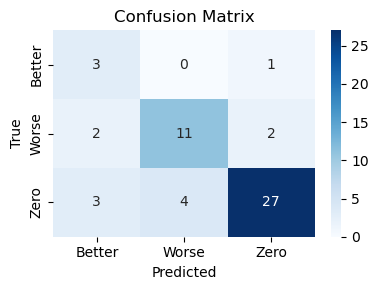

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assume you already have y_true and y_pred
labels = ["Better", "Worse", "Zero"]  # set in the order you want

cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig('conf.png',dpi=300,bbox_inches='tight')
plt.show()
